In [1]:
pip install yfinance


     -------------------------------------- 72.4/72.4 kB 565.1 kB/s eta 0:00:00
     -------------------------------------- 112.2/112.2 kB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 12.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.1-py3-none-any.whl size=136948 sha256=b45b2989e49870958c7262b65855d7d2768b4b742ba41be87ef5f86a23391003
  Stored in directory: c:\users\91891\appdata\local\pip\cache\wheels\d7\35\5c\1374782be033462df5f40174d8d879519d64ed8c25a1977554
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np


ticker_data1 = yf.Ticker('GOOG')
ticker_data2 = yf.Ticker('MSFT')

In [3]:
import datetime as dt
from datetime import date, timedelta
today = date.today()
d1= today.strftime("%Y-%m-%d")
d2 = (today - timedelta(days=365)).strftime("%Y-%m-%d")
start_date=d2
end_date=d1

In [4]:
tickerDf1 = ticker_data1.history(period='1d', start='2018-01-01', end=end_date)
tickerDf2 = ticker_data2.history(period='1d', start='2018-01-01', end=end_date)

c:\Users\91891\AppData\Local\Programs\Python\Python310\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\91891\AppData\Local\Programs\Python\Python310\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [10]:
tickerDf1.head()


NameError: name 'tickerDF2' is not defined

In [11]:
tickerDf2.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-02-13 00:00:00-05:00,404.192550,409.313085,402.645423,405.570007,27824900,0.00,0.0
2024-02-14 00:00:00-05:00,408.070007,409.839996,404.570007,409.489990,20401200,0.75,0.0
2024-02-15 00:00:00-05:00,408.140015,409.130005,404.290009,406.559998,21825500,0.00,0.0
2024-02-16 00:00:00-05:00,407.959991,408.290009,403.440002,404.059998,22281100,0.00,0.0
2024-02-20 00:00:00-05:00,403.239990,404.489990,398.010010,402.790009,24278300,0.00,0.0


In [54]:
pip install matplotlib 

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: matplotlib in c:\users\91891\appdata\local\programs\python\python310\lib\site-packages (3.8.3)



ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as

[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: title={'center': "Microsoft's stock price"}, xlabel='Date'>

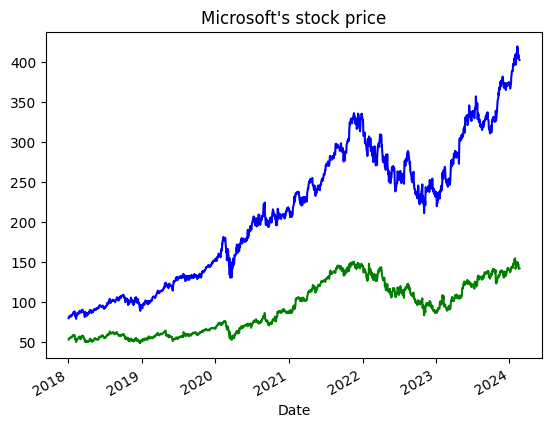

In [55]:
tickerDf1['Close'].plot(title="google's stock price" , color='green')
tickerDf2['Close'].plot(title="Microsoft's stock price" , color='blue')

In [56]:
tickerDf1.to_csv('google.csv')
tickerDf2.to_csv('microsoft.csv')

In [57]:
df1=tickerDf1
df2=tickerDf2
df1=df1.reset_index()
df1.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-01-02 00:00:00-05:00,52.417000,53.347000,52.261501,53.250000,24752000,0.0,0.0
1,2018-01-03 00:00:00-05:00,53.215500,54.314499,53.160500,54.124001,28604000,0.0,0.0
2,2018-01-04 00:00:00-05:00,54.400002,54.678501,54.200100,54.320000,20092000,0.0,0.0
3,2018-01-05 00:00:00-05:00,54.700001,55.212502,54.599998,55.111500,25582000,0.0,0.0
4,2018-01-08 00:00:00-05:00,55.111500,55.563499,55.081001,55.347000,20952000,0.0,0.0


In [58]:
df1=df1.drop(['Date','Dividends','Stock Splits'],axis=1)

In [59]:
df1.head()

,Open,High,Low,Close,Volume
0,52.417000,53.347000,52.261501,53.250000,24752000
1,53.215500,54.314499,53.160500,54.124001,28604000
2,54.400002,54.678501,54.200100,54.320000,20092000
3,54.700001,55.212502,54.599998,55.111500,25582000
4,55.111500,55.563499,55.081001,55.347000,20952000


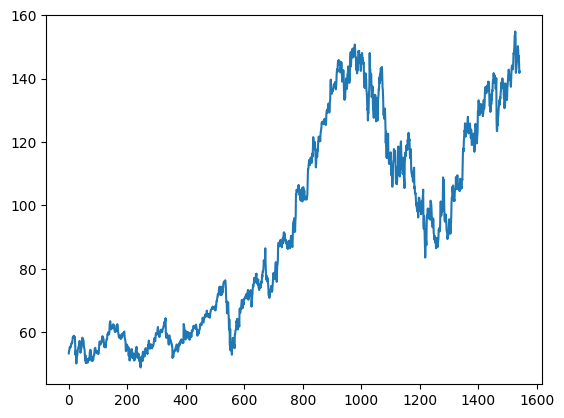

In [62]:
import matplotlib.pyplot as plt
plt.plot(df1.Close)


In [63]:
df1

,Open,High,Low,Close,Volume
0,52.417000,53.347000,52.261501,53.250000,24752000
1,53.215500,54.314499,53.160500,54.124001,28604000
2,54.400002,54.678501,54.200100,54.320000,20092000
3,54.700001,55.212502,54.599998,55.111500,25582000
4,55.111500,55.563499,55.081001,55.347000,20952000
...,...,...,...,...,...
1538,146.070007,148.039993,145.110001,146.369995,18138500
1539,147.369995,147.830002,145.554993,147.139999,16651800
1540,144.460007,144.759995,141.880005,143.940002,26724300
1541,144.210007,144.479996,141.520004,141.759995,21849700


In [73]:
ma100=df1.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1538    138.3860
1539    138.5438
1540    138.6707
1541    138.7666
1542    138.8941
Name: Close, Length: 1543, dtype: float64

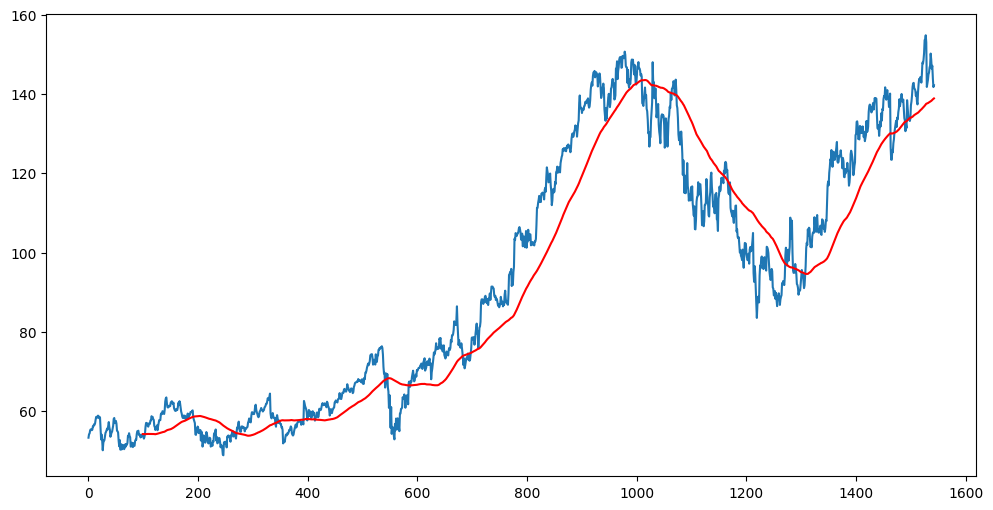

In [74]:
plt.figure(figsize=(12,6))
plt.plot(df1.Close)
plt.plot(ma100,'red')



In [75]:
df1.shape

(1543, 5)

In [80]:
#Spliting data into training and testing
d_train=pd.DataFrame(df1['Close'][0:int(len(df1)*0.70)])
d_testing=pd.DataFrame(df1['Close'][int(len(df1)*0.70):int(len(df1))])
print(d_train.shape)
print(d_testing.shape)
d_train.head()
d_testing.head()


(1080, 1)
(463, 1)


,Close
1080,127.960999
1081,130.531006
1082,128.245499
1083,124.937500
1084,119.613998


In [85]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.Collecting scikit-learn
     --------------------------------------- 10.6/10.6 MB 14.2 MB/s eta 0:00:00
     ------------------------------------- 302.2/302.2 kB 18.2 MB/s eta 0:00:00
     ---------------------------------------- 46.2/46.2 MB 5.4 MB/s eta 0:00:00




[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [89]:
d_train_array=scaler.fit_transform(d_train)
d_train_array

array([[0.04356316],
       [0.05214037],
       [0.05406386],
       ...,
       [0.7808151 ],
       [0.79957404],
       [0.76980901]])

In [90]:
d_train_array.shape

(1080, 1)

In [93]:
x_train=[]
y_train=[]

for i in range(100,d_train_array.shape[0]):
    x_train.append(d_train_array[i-100:i])
    y_train.append(d_train_array[i,0])

x_train,y_train =np.array(x_train),np.array(y_train)


In [96]:
#ml model
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [ ]:
model=Sequential()
model.add(LSTM(units=5,activation='relu',return_sequences=True,
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=5,activation='relu',return_sequences=True,
               ))
model.add(Dropout(0.2))

model.add(LSTM(units=5,activation='relu',return_sequences=True,
               ))
model.add(Dropout(0.2))

model.add(LSTM(units=5,activation='relu',return_sequences=True,
               ))
model.add(Dropout(0.2))